# Unsupervised Analysis  of Days of Week

Treating crossing each day as features to learn about the relationships between various days

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd
import numpy as np
import sklearn

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

## Get Data

In [2]:
import os
from urllib.request import urlretrieve

FREMONT_URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data(filename='Fremont.csv',url=FREMONT_URL,force_download=True):
    
    """Download and cash the fremont data 
    
    Parameters
    --------------
    filename : string (optional)
        location save the data
    url : string (optional)
        web location of the data
    force_download : bool (optional)
        if True, redownload of data     
        
    Returns
    ---------------
    data : Pandas.DatFrame
            The fremont bridge data
    
    """
    
    if force_download or not os.path.exists(filename):
        urlretrieve(url,filename)   
    data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
    pd.to_datetime(data.index, format='%m/%d/%Y %H:%M:%S %p')
    data.columns = ['Total','West','East']
    return data

In [3]:
data = get_fremont_data()
data.head()

,Total,West,East
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [4]:
""""def test_fremont_data():
    assert all(data.columns == ['West','East','Total'])
    assert isinstance(data.index, pd.DatatimeIndex)"""

'"def test_fremont_data():\n    assert all(data.columns == [\'West\',\'East\',\'Total\'])\n    assert isinstance(data.index, pd.DatatimeIndex)'

In [5]:
""""test_fremont_data()"""

'"test_fremont_data()'

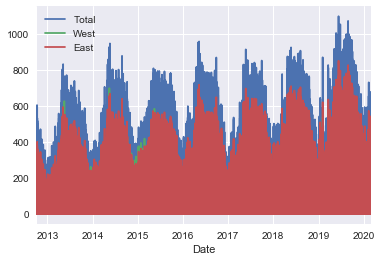

In [6]:
data.plot()

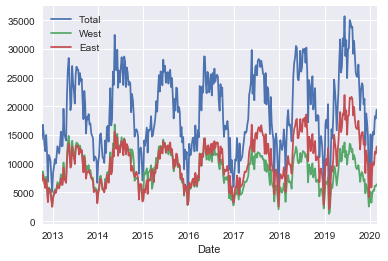

In [7]:
data.resample('W').sum().plot()

(0, 1248385.3)

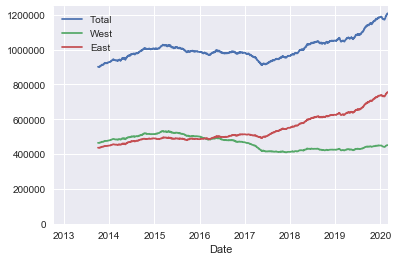

In [8]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

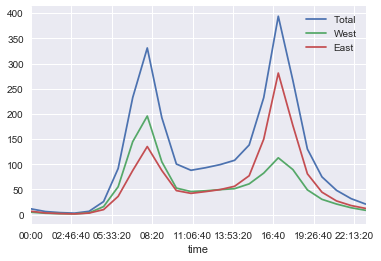

In [9]:
data.groupby(data.index.time).mean().plot()

In [10]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


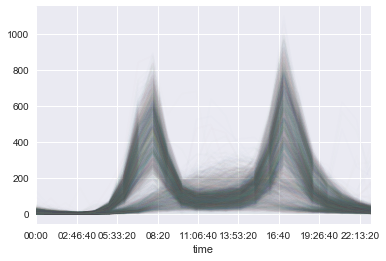

In [11]:
pivoted.plot(legend=False, alpha = 0.01)

In [12]:
data = pd.read_csv('Fremont.csv', index_col='Date')
try:
    data.index = pd.to_datetime(data.index, format='%m/%d/%Y %H:%M:%S %p')
except TypeError:
    data.index = pd.to_datetime(data.index)
data.index

DatetimeIndex(['2012-10-03 12:00:00', '2012-10-03 01:00:00',
               '2012-10-03 02:00:00', '2012-10-03 03:00:00',
               '2012-10-03 04:00:00', '2012-10-03 05:00:00',
               '2012-10-03 06:00:00', '2012-10-03 07:00:00',
               '2012-10-03 08:00:00', '2012-10-03 09:00:00',
               ...
               '2020-02-29 02:00:00', '2020-02-29 03:00:00',
               '2020-02-29 04:00:00', '2020-02-29 05:00:00',
               '2020-02-29 06:00:00', '2020-02-29 07:00:00',
               '2020-02-29 08:00:00', '2020-02-29 09:00:00',
               '2020-02-29 10:00:00', '2020-02-29 11:00:00'],
              dtype='datetime64[ns]', name='Date', length=64944, freq=None)

In [13]:
np.unique(data.index.time)

array([datetime.time(1, 0), datetime.time(2, 0), datetime.time(3, 0),
       datetime.time(4, 0), datetime.time(5, 0), datetime.time(6, 0),
       datetime.time(7, 0), datetime.time(8, 0), datetime.time(9, 0),
       datetime.time(10, 0), datetime.time(11, 0), datetime.time(12, 0)],
      dtype=object)

## Principal Component Analysis

In [14]:
X = pivoted.fillna(0).T.values
X.shape

(2706, 24)

In [15]:
X2 = PCA(2, svd_solver='full').fit_transform(X)
X2.shape

(2706, 2)

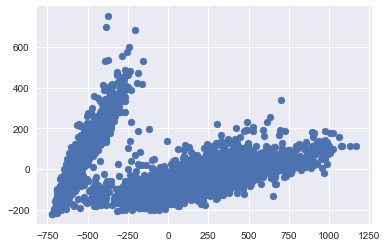

In [16]:
plt.scatter(X2[:, 0], X2[:, 1])

In [17]:
sklearn.__version__

'0.21.3'

## Unsupervised Clustering

In [18]:
gmm = GaussianMixture(2).fit(X)
labels= gmm.predict(X)

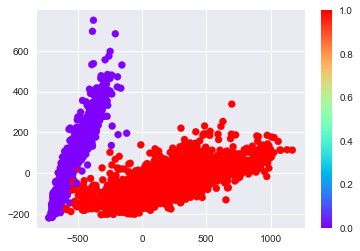

In [19]:
plt.scatter(X2[:,0],X2[:,1],c=labels,cmap='rainbow')
plt.colorbar()

Text(0.5, 1.0, 'Red Cluster')

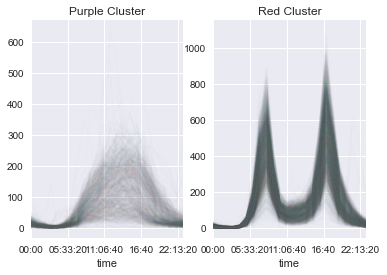

In [20]:
fig, ax = plt.subplots(1, 2 ) 

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.01, ax=ax[0])
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.01, ax=ax[1])

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster')


## Comparing with Day of Week

In [21]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

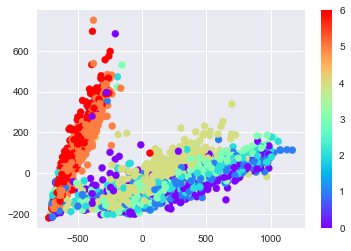

In [22]:
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar()

## Analyzing Outliers

In [23]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
               '2020-02-21', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28'],
              dtype='datetime64[ns]', length=1862, freq=None)